In [139]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [140]:
# Importation des librairies
import pandas as pd
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

In [141]:
dataset_url = "../data/image_classification/"

## Load data

In [142]:
data = pd.read_csv(dataset_url + "train.csv", on_bad_lines="skip")
data.head()

,ImageID,Labels,Caption
0,0.jpg,1,Woman in swim suit holding parasol on sunny day.
1,1.jpg,1 19,A couple of men riding horses on top of a gree...
2,2.jpg,1,They are brave for riding in the jungle on tho...
3,3.jpg,8 3 13,a black and silver clock tower at an intersect...
4,4.jpg,8 3 7,A train coming to a stop on the tracks out side.


## Analyse générale du dataset

In [143]:
data.shape

(29996, 3)

In [144]:
# Transformer la target multi-classes en liste
data["Targets"] = data["Labels"].apply(lambda x: x.split(" "))
data.head()

,ImageID,Labels,Caption,Targets
0,0.jpg,1,Woman in swim suit holding parasol on sunny day.,[1]
1,1.jpg,1 19,A couple of men riding horses on top of a gree...,"[1, 19]"
2,2.jpg,1,They are brave for riding in the jungle on tho...,[1]
3,3.jpg,8 3 13,a black and silver clock tower at an intersect...,"[8, 3, 13]"
4,4.jpg,8 3 7,A train coming to a stop on the tracks out side.,"[8, 3, 7]"


## Analyse de la variable cible 

In [145]:
# Liste des classes et leurs nombres d'occurences quand ils sont uniques
data[data["Targets"].apply(len) == 1].groupby(
    data["Targets"].apply(lambda x: str(x))
).count()

,ImageID,Labels,Caption,Targets
Targets,,,,
['1'],14073,14073,14073,14073
['10'],186,186,186,186
['11'],187,187,187,187
['13'],200,200,200,200
['14'],42,42,42,42
['15'],289,289,289,289
['16'],673,673,673,673
['17'],975,975,975,975
['18'],585,585,585,585


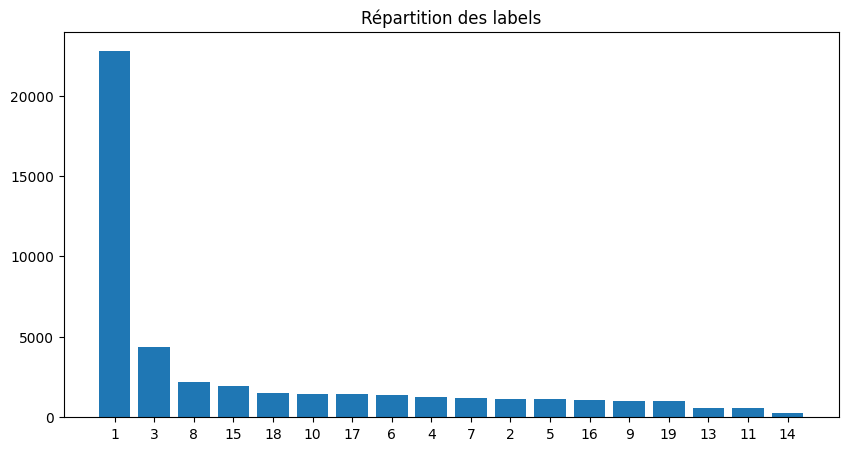

In [146]:
# Nombre d'occurences de chaque classe

label_counts = pd.DataFrame(data["Targets"].explode().value_counts()).reset_index()
label_counts.columns = ["Label", "Count"]
label_counts["Proportion"] = label_counts["Count"] / label_counts["Count"].sum()

plt.figure(figsize=(10, 5))
plt.bar(label_counts["Label"], label_counts["Count"])
plt.title("Répartition des labels")
plt.show()

* Possibilité de sous-échantillonner les classes majoritaires (ici, la classe 1)
    * Reduire le plus de donnees avec pour label 1 uniquement (garder un peu pour pouvoir identifier la classe 1 aussi)
* Et sur-échantillonner les classes minoritaires
    * Generer des donnees artificielles en evident ce qui ont la classe 1 dans leurs labels

## Exploration des images

Classes found: ['1' '19' '8' '3' '13' '7' '5' '4' '18' '15' '6' '9' '17' '10' '2' '16'
 '14' '11']


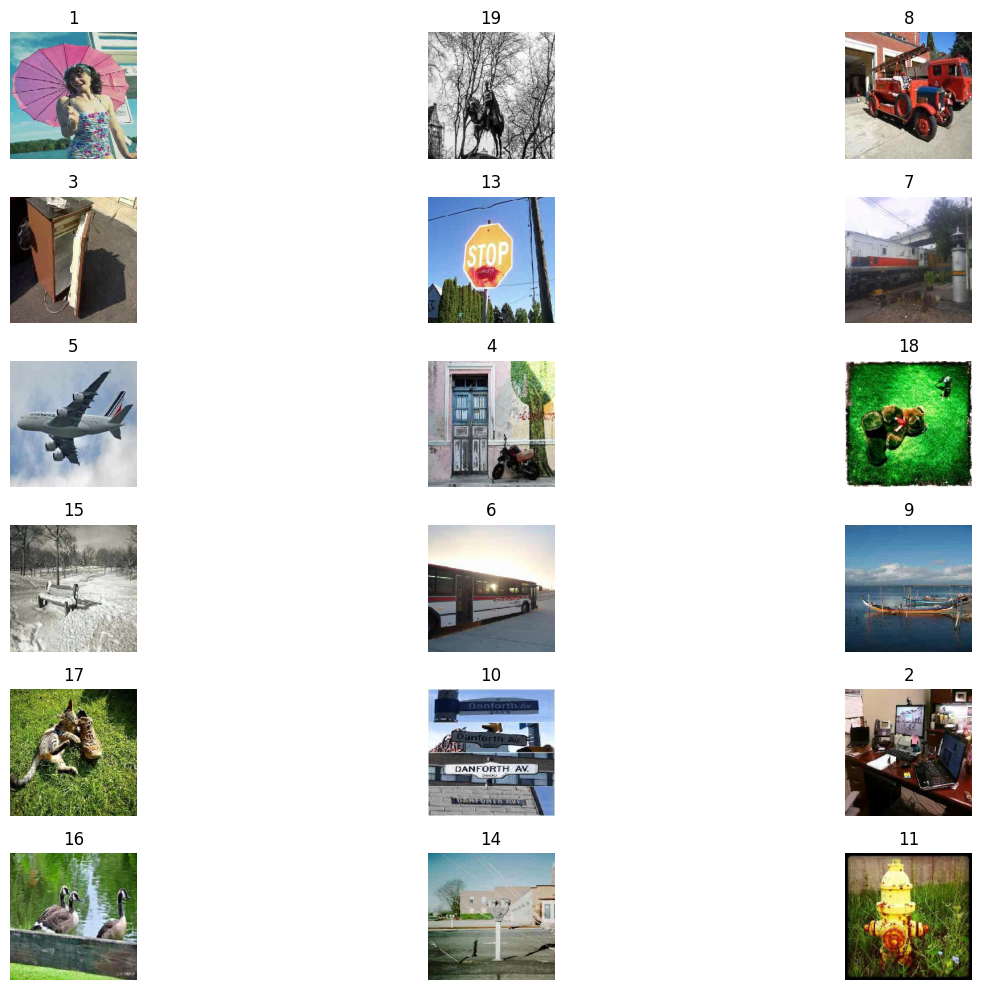

In [147]:
# List classes available in the dataset
classes = data["Targets"].explode().unique()
print("Classes found:", classes)

num_cols = 3
num_rows = 6

plt.figure(figsize=(15, 10))
for i, cls in enumerate(classes):
    image = data[data["Targets"].apply(lambda x: x == [cls])]
    if not image.empty:
        img = load_img(
            dataset_url + "data/" + image.iloc[0]["ImageID"], target_size=(224, 224)
        )
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(img)
        plt.title(cls)
        plt.axis("off")

        plt.savefig("../output/visualize_classes.png")

plt.tight_layout()
plt.show()

## Analyse des descriptions textuelles

In [148]:
temp = data.copy()

print("Exemples de descriptions :")
print(temp["Caption"].sample(5, random_state=42))

Exemples de descriptions :
2308     A girl playing a game on a laptop computer on ...
7759                 Small toddler reading a book on a bed
24872             A cat standing on top of a refrigerator.
7047          A couple of elephants standing in the grass.
2664                     A cat that is laying on a laptop.
Name: Caption, dtype: object


In [149]:
temp["Description_Length"] = temp["Caption"].apply(lambda x: len(x.split()))
average_length = temp["Description_Length"].mean()
print(f"\nLongueur moyenne des descriptions : {average_length:.2f} mots")


Longueur moyenne des descriptions : 10.49 mots


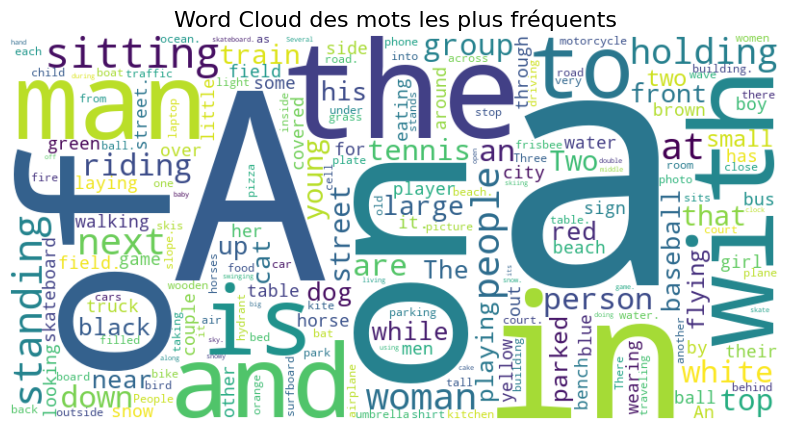

In [150]:
all_words = " ".join(temp["Caption"]).split()
word_counts = Counter(all_words)

# Générer un word cloud
wordcloud = WordCloud(
    width=800, height=400, background_color="white"
).generate_from_frequencies(word_counts)

# Afficher le word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud des mots les plus fréquents", fontsize=16)
plt.show()

## Relation entre les images et les descriptions textuelles

In [ ]:
import os
import cv2
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def visualize_text_and_image_relationship(data, label_column, text_column, image_dir):

    for label in label_column:
        # Filtrer les données pour le label actuel
        label_data = data[data["Labels"].apply(lambda x: str(label) == x)]

        if label_data.empty:
            continue

        all_words = " ".join(label_data[text_column]).split()
        word_counts = Counter(all_words)

        wordcloud = WordCloud(
            width=800, height=400, background_color="white"
        ).generate_from_frequencies(word_counts)

        # Créer une figure avec deux sous-graphiques : nuage de mots à gauche, images à droite
        fig = plt.figure(figsize=(20, 10))

        # nuage de mots
        ax1 = fig.add_subplot(1, 2, 1)
        ax1.imshow(wordcloud, interpolation="bilinear")
        ax1.axis("off")
        ax1.set_title(f"Nuage de mots pour le label {label}", fontsize=16)

        # image
        image = label_data.sample(1, random_state=42).iloc[0]
        ax2 = fig.add_subplot(1, 2, 2)
        img_path = os.path.join(image_dir, image.ImageID)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax2.imshow(img)
        ax2.axis("off")
        ax2.set_title(f"Image pour le label {label}", fontsize=16)
        plt.subplots_adjust(wspace=0.5)
        plt.show()

        plt.tight_layout()
        plt.show()


visualize_text_and_image_relationship(
    temp, range(1, 20), "Caption", "../data/image_classification/data/"
)
# Resultats dans le dossier output

## Séparation des données

In [152]:
train_len = 0.7
val_len = 0.15
test_len = 0.15
random_state = 42

# Création du DataFrame
df = pd.DataFrame(data)

# Conversion des labels en listes d'entiers
df["Labels"] = df["Labels"].apply(lambda x: list(map(int, x.split())))

# Séparation des features et des labels
X = df[["ImageID", "Caption"]]
y = df["Labels"]

# Conversion des labels en format binaire (multilabel-indicator)
mlb = MultiLabelBinarizer()
y_binary = mlb.fit_transform(y)

# Division stratifiée en ensembles d'entraînement et de test
msss = MultilabelStratifiedShuffleSplit(
    n_splits=1, test_size=test_len, random_state=random_state
)
for train_index, test_index in msss.split(X, y_binary):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_binary[train_index], y_binary[test_index]

# Division de l'ensemble d'entraînement en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    test_size=val_len / (train_len + val_len),
    random_state=random_state,
)

# Affichage des tailles des ensembles
print(f"Train size: {X_train.shape}, {y_train.shape}")
print(f"Validation size: {X_val.shape}, {y_val.shape}")
print(f"Test size: {X_test.shape}, {y_test.shape}")

Train size: (21004, 2), (21004, 18)
Validation size: (4501, 2), (4501, 18)
Test size: (4491, 2), (4491, 18)


## Save csv

In [154]:
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

X_train["ImageURL"] = X_train["ImageID"].apply(
    lambda x: "../data/image_classification/data/" + x
)
X_val["ImageURL"] = X_val["ImageID"].apply(
    lambda x: "../data/image_classification/data/" + x
)
X_test["ImageURL"] = X_test["ImageID"].apply(
    lambda x: "../data/image_classification/data/" + x
)

y_train = pd.DataFrame(y_train, columns=mlb.classes_)
y_val = pd.DataFrame(y_val, columns=mlb.classes_)
y_test = pd.DataFrame(y_test, columns=mlb.classes_)

y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

train = pd.concat([X_train, y_train], axis=1)
val = pd.concat([X_val, y_val], axis=1)
test = pd.concat([X_test, y_test], axis=1)

train.to_csv("../data/image_classification/split_train.csv", index=False)
val.to_csv("../data/image_classification/split_val.csv", index=False)
test.to_csv("../data/image_classification/split_test.csv", index=False)